In [14]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from core.util.plot_predictions import plot_predictions
from core.util.get_datasets import get_park_dataset
from core.util.trefor_dataset import TreforData
from core.util.loss_functions import zap_loss
from core.models import LSTM
from core.models.model_training import train_model, test_model

Set global parameters.

In [15]:
batch_size = 128
EPOCHS = 50
lookback = 24
loss_function = zap_loss

Use CUDA (GPU) if available.

In [16]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

Split data into a training, validation, and test set. Output of the get_timeserie_dataset are tensors.

In [17]:
x_train, y_train, x_val, y_val, x_test, y_test = get_park_dataset(lookback, 24)
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_val = torch.tensor(x_val).float()
y_val = torch.tensor(y_val).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

Create the datasets for train, validation and test.

In [18]:
train_dataset = TreforData(x_train, y_train, device)
val_dataset = TreforData(x_val, y_val, device)
test_dataset = TreforData(x_test, y_test, device)

Load data into a dataloader with specified batch size from global parameter. Don't shuffle as we use time series were order matters

In [19]:
training_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
testing_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Initialize a very basic LSTM.

In [20]:
model = LSTM(input_size=1, hidden_size=5, num_layers=1, dropout_rate=0.2)
model.to(device)

LSTM(
  (lstm): LSTM(1, 5, batch_first=True, dropout=0.2)
  (relu): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=5, out_features=24, bias=True)
)

Validate the training model on the validation set for each epoch.

In [21]:
plot_train_loss, plot_val_loss, best_model = train_model(
    EPOCHS, model, zap_loss, training_loader, validation_loader
)

Iterating epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Evaluate the final model on the test data.

In [22]:
t_loss, predicted = test_model(best_model, zap_loss, testing_loader)
print(f"Avg loss: {t_loss:>8f} \n")

Avg loss: 0.012689 



## Visualize model performance
Visualize the training and validation loss.

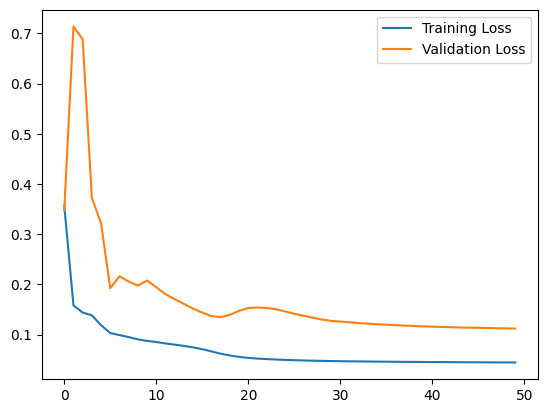

In [23]:
plt.clf()
plt.plot(plot_train_loss, label="Training Loss")
plt.plot(plot_val_loss, label="Validation Loss")
plt.legend()
plt.show()

Plot the actual values and predictions from the model on the validation set.

Plot predictions for the first 7 days in the validation set

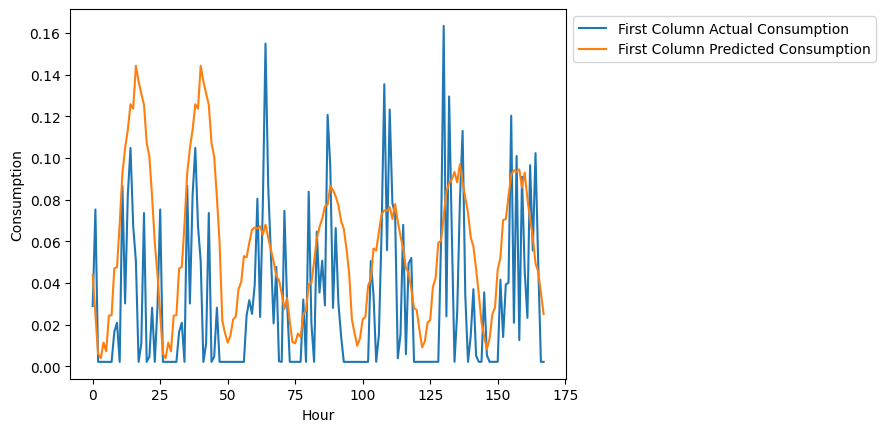

In [24]:
plot_predictions(0, 6, y_test, predicted)

Plot predictions for the last 7 days in the validation set

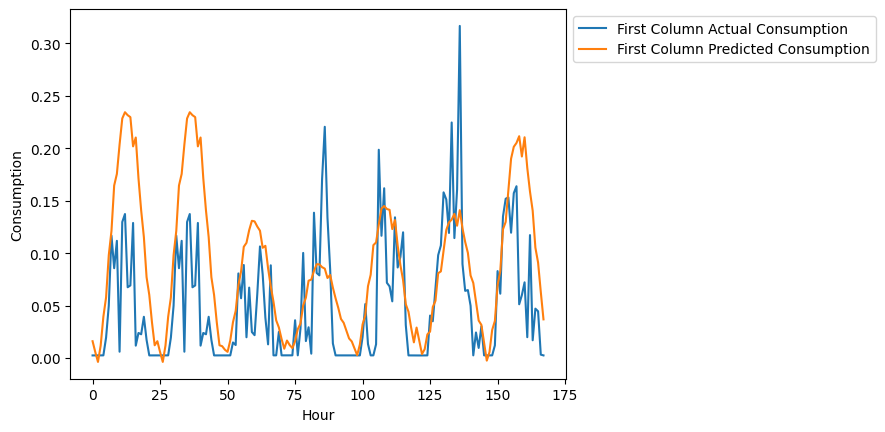

In [25]:
plot_predictions(-7, -1, y_test, predicted)

Plot predictions for 7 days in the in the middle of the validation set.

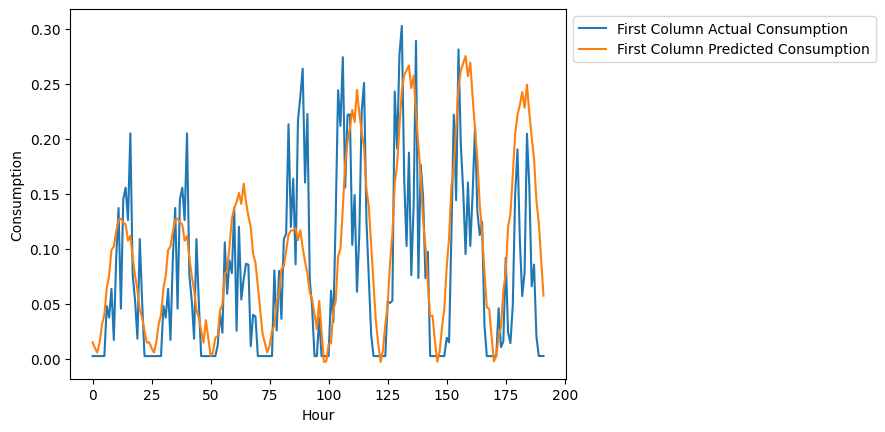

In [26]:
days_count = len(y_test) / 24
plot_predictions(int(days_count / 2), int(days_count / 2 + 7), y_test, predicted)